In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

C:\Users\chanw\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
plt.rc('font', family='Malgun Gothic')

In [31]:
plt.rcParams['axes.unicode_minus'] = False

## 데이터셋 구축

In [3]:
#순이동
df = pd.read_csv("./데이터/인구 데이터/시군구별 이동자수.csv", encoding='cp949')

In [4]:
df = df.drop("단위", axis=1)
df = df[df["항목"] == "순이동[명]"]
df = df.drop("항목", axis =1)

In [5]:
move_df = df

In [10]:
a = move_df[["행정구역(시군구)별", "2021.01 월","2021.02 월","2021.03 월","2021.04 월","2021.05 월","2021.06 월","2021.07 월","2021.08 월","2021.09 월","2021.10 월","2021.11 월","2021.12 월"]]

In [11]:
a["순이동 총합"] = a.iloc[:, 1:13].sum(axis=1)

<ipython-input-11-b0e0e161bf40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["순이동 총합"] = a.iloc[:, 1:13].sum(axis=1)


In [12]:
a = a[["행정구역(시군구)별", "순이동 총합"]]
a

,행정구역(시군구)별,순이동 총합
2,종로구,-2224
10,중구,-1209
18,용산구,-3561
26,성동구,-6244
34,광진구,-5228
42,동대문구,-2076
50,중랑구,-5090
58,성북구,-3340
66,강북구,-5904
74,도봉구,-5787


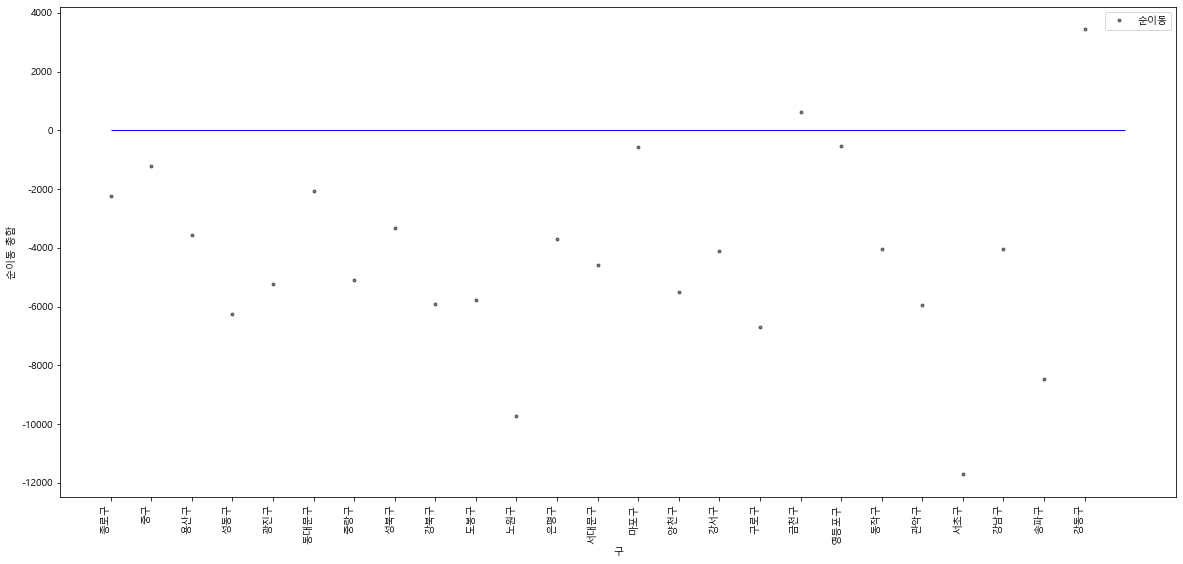

In [34]:
#시계열 고려해서 해야함

fig = plt.figure(figsize=(20,10))
X = a

plt.plot(  X.iloc[:,0]
         , X.iloc[:,1]
         , 'o'
         , markersize=3
         , color='black'
         , alpha=0.5
         , label='순이동'
        )

plt.xlabel('구')
plt.ylabel('순이동 총합')
plt.xlabel('구', fontsize=10)
fig.autofmt_xdate(rotation=90)

plt.hlines(0,0,25, color='blue', linestyle='solid', linewidth=1)

plt.legend()
plt.show()

In [13]:
#사유
df = pd.read_csv("./데이터/인구 데이터/전입지_이동사유별_인구이동.csv")

In [14]:
reason = df

In [19]:
reason = reason[reason["시점"] == 2021]

In [47]:
reason = reason[(reason["구간별"] == '총이동')]

In [48]:
a1 = reason[(reason["자치구별"] == '노원구')]

In [49]:
a1

,시점,자치구별(1),자치구별,구간별,소계,직업,가족,주택,교육,주거환경,자연환경,기타
657,2021,서울시,노원구,총이동,58736,6626,13572,25074,4244,2064,191,6965


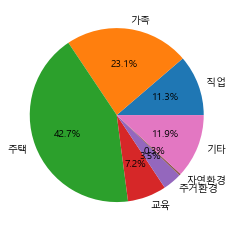

In [50]:
#노원구 파이차트
ratio = [6626, 13572, 25074, 4244, 2064, 191, 6965]
labels = ['직업', '가족', '주택', '교육', '주거환경', '자연환경', '기타']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [53]:
a2 = reason[(reason["자치구별"] == '서초구')]

In [54]:
a2

,시점,자치구별(1),자치구별,구간별,소계,직업,가족,주택,교육,주거환경,자연환경,기타
690,2021,서울시,서초구,총이동,70064,12618,15642,30599,3217,3541,254,4193


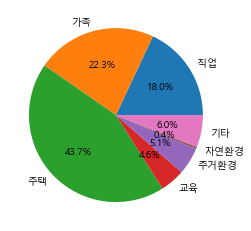

In [55]:
#서초구 파이차트
ratio = [12618, 15642, 30599, 3217, 3541, 254, 4193]
labels = ['직업', '가족', '주택', '교육', '주거환경', '자연환경', '기타']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [56]:
a3 = reason[(reason["자치구별"] == '강동구')]

In [57]:
a3

,시점,자치구별(1),자치구별,구간별,소계,직업,가족,주택,교육,주거환경,자연환경,기타
699,2021,서울시,강동구,총이동,77883,11717,17041,39724,2126,3090,189,3996


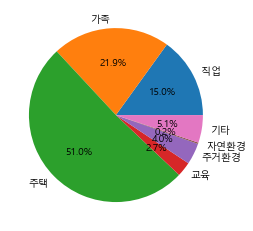

In [58]:
#강동구 파이차트
ratio = [11717, 17041, 39724, 2126, 3090, 189, 3996]
labels = ['직업', '가족', '주택', '교육', '주거환경', '자연환경', '기타']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()